<center> <h5>Wintersemester 2024/25</h5> </center>
<center> <h1>Medizinische Bildanalyse</h1> </center>
<center> <h3>Aufgabenblatt 5</h3> </center>
<center> <h5>11. November 2024</h5> </center>
<center> <h5>
    Prof. Dr. Thomas Schultz, 
    <a href = "mailto: jlen@uni-bonn.de">Jonathan Lennartz</a>,
    <a href = "mailto: jgruen@uni-bonn.de">Dr. Johannes Grün</a>
</h5> </center>
<center> <h5>Abgabefrist: <b>18.11.2024, 10:00 Uhr, via eCampus</b></h5> </center>

* Bei Fragen bezüglich der Aufgaben nutzt das Forum in eCampus
* Die Aufgaben können in Gruppen von **bis zu drei** Studierenden abgegeben werden (eine Abgabe pro Gruppe). Findet euch dazu auf eCampus in Teams zusammen.
* Ladet die Abgaben in einem Zip-Archiv hoch. Es sollte das Notebook selbst, einen Export als HTML oder PDF und alle nötigen Datein enthalten, um die Ergebnisse zu reproduzieren. 

# Aufgabe 1 (Interaktive CT Visualisierung, 15+3 (Bonus-)Punkte)  
IPyWidgets (https://ipywidgets.readthedocs.io/en/latest/index.html) sind nützlich um schnell interaktive Plots zu erzeugen oder in Bildanalyse-Algorithmen verschiedene Parameter auszuprobieren. Ziel dieser Aufgabe ist es, ihre grundlegende Funktionsweise anhand einer interaktiven CT Visualisierung zu erlernen.

<figure align="center">
  <img alt="Brain" src="interactive.png" width="70%">
  <figcaption style='margin-left: 25%;font-family: Serif;'> Abbildung 1: Interaktive CT Visualisierung.</figcaption>
</figure>
</br>

a) Ladet die Datei _head.npy_. Sie enthält einen Kopf-CT-Scan mit Intensitäten in Hounsfield-Einheiten. (1 Punkt)


In [1]:
import numpy as np
# Lösung

head = np.load("head.npy")
print(head.shape)

(128, 128, 93)


b) Schreibt eine Funktion die als Argumente die Daten, x-, y-, und z-Slices entgegen nimmt und eine Visualisierung in schwarz-weiß entlang aller 3 Achsen erzeugt, entsprechend der Darstellung in Abbildung 1. Erzeugt eine Visualisierung entlang der Slices (50, 50, 70). Sorgt dafür, dass die Schichten dieselbe Farbskala benutzen und zeigt die Farbskala an. Dazu sollte _vmin_ und _vmax_ der Visualisierungsfunktion übergeben werden. (5 Punkte)

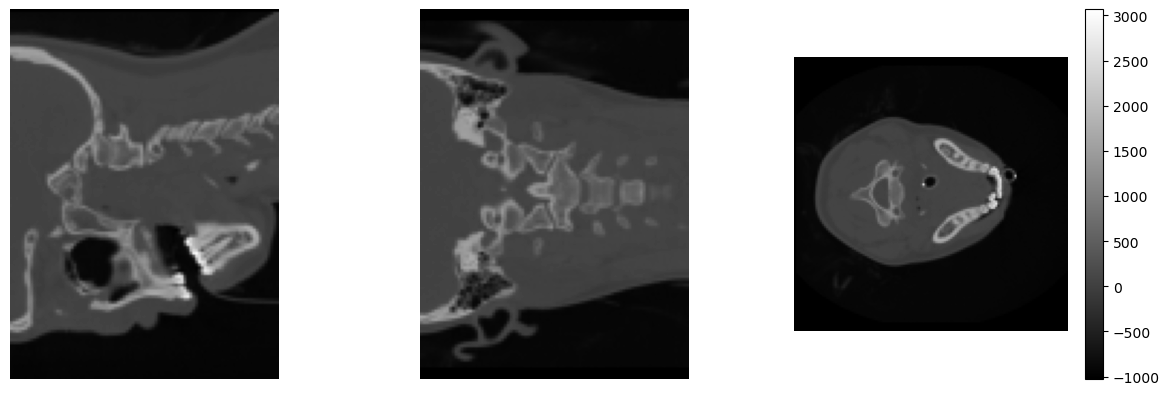

In [2]:
import matplotlib.pyplot as plt

# Lösung 
def display_slice(data, x, y, z):
    vmin = data.min()
    vmax = data.max()

    fig, axes = plt.subplots(1, 3)
    fig.set_figwidth(15)

    axes[0].imshow(data[x,:,:], vmin=vmin, vmax=vmax, cmap="gray")
    axes[0].set_axis_off()

    axes[1].imshow(data[:,y,:], vmin=vmin, vmax=vmax, cmap="gray")
    axes[1].set_axis_off()

    pos = axes[2].imshow(data[:,:,z], vmin=vmin, vmax=vmax, cmap="gray")
    axes[2].set_axis_off()
    
    fig.colorbar(pos)

    plt.show()

display_slice(head, 50, 50, 70)

c) Fügt der Funktion zwei weitere Parameter hinzu, die eine Fensterung erlauben, wie sie in Kapitel 1 der Vorlesung eingeführt wurde. Visualisiert dieselben Slices wie zuvor, aber setzt das Zentrum und die Breite so, dass Knochen gut sichtbar sind. (2 Punkte) 

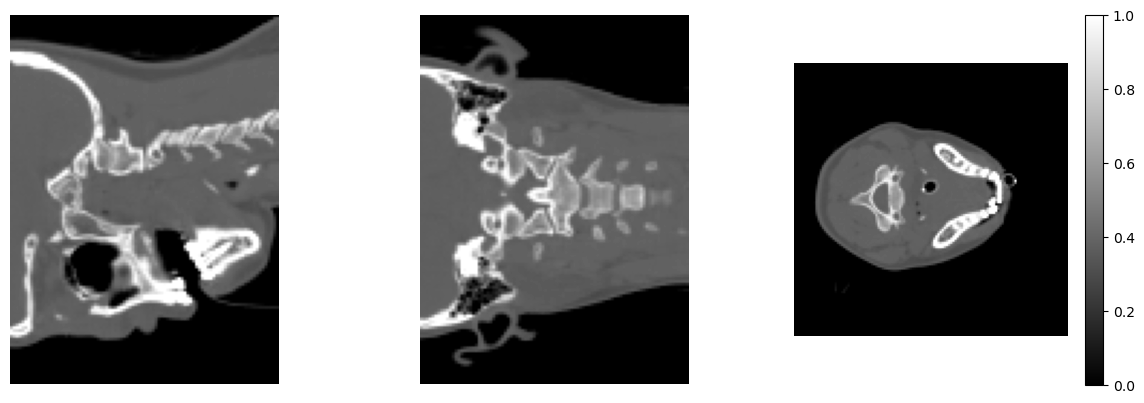

In [3]:
# Lösung
def fensterung(data, center, width):
    x = np.copy(data)

    smaller = (x <= center - 0.5 - (width - 1) / 2)
    greater = (x > center - 0.5 + (width - 1) / 2)

    x = (x - (center - 0.5)) / (width - 1) + 0.5
    x[smaller] = 0
    x[greater] = 1

    return x

def display_slice_f(data, x, y, z, center, width):
    new_data = fensterung(data, center, width)

    display_slice(new_data, x, y, z)

display_slice_f(head, 50, 50, 70, 300, 2000)

 d) Um ein interaktives Ändern der Schicht und der Fensterung zu ermöglichen, kann ein _IntSlider_ von _ipywidgets_ verwendet werden. Erstellt in der explore-Funktion für die x-, y- und z-Slices sowie für das Zentrum und die Breite der Fensterung jeweils einen _IntSlider_ mit sinnvollen Minimal- und Maximalwerten und benennt diese sinnvoll. Zur Visualisierung kann die interact-Funktion verwendet werden. Diese nimmt die oben erstellte Visualisierungsfunktion als erstes Argument und die _IntSlider_ als weitere Keyword-Argumente. Verwendet die Funktion, um die Visualisierung interaktiv zu gestalten. (7 Punkte)

In [ ]:
from ipywidgets import interact, IntSlider, fixed

#Lösung

def explore_slices(data):
    x_slider = IntSlider(min=0, max=data.shape[0]-1, value=50)
    y_slider = IntSlider(min=0, max=data.shape[1]-1, value=50)
    z_slider = IntSlider(min=0, max=data.shape[2]-1, value=70)
    c_slider = IntSlider(min=data.min(), max=data.max(), value=300)
    w_slider = IntSlider(min=2, max=2000, value=2000)

    interact(display_slice_f, data=fixed(data), x=x_slider, y=y_slider, z=z_slider, center=c_slider, width=w_slider)

explore_slices(head)

interactive(children=(IntSlider(value=50, description='x', max=127), IntSlider(value=50, description='y', max=…

e) **Bonusaufgabe:** Um die Visualisierung schöner zu gestalten kann mit _VBox_ und _HBox_ die Anordnung der Slider angepasst werden. Um die neue Anordnung zu erzeugen muss die _display_ Funktion genutzt werden. Hierdurch werden die Slider allerdings doppelt angezeigt (Wieso?). Das kann verhindert werden, indem man die _interactive\_output_ Funktion benutzt und den Rückgabewert auch displayed. Erzeugt eine Anordnung analog zu Abbildung 1. (3 Bonuspunkte)


In [6]:
from ipywidgets import interact, IntSlider, fixed, HBox, VBox, Label, interactive_output
from IPython.display import display

# Lösung 
def explore_slices(data):
    x_slider = IntSlider(min=0, max=data.shape[0]-1, value=50)
    y_slider = IntSlider(min=0, max=data.shape[1]-1, value=50)
    z_slider = IntSlider(min=0, max=data.shape[2]-1, value=70)
    c_slider = IntSlider(min=data.min(), max=data.max(), value=300)
    w_slider = IntSlider(min=2, max=2000, value=2000)

    x_box = VBox([Label("Slice Index (Axis 0)"), x_slider])
    y_box = VBox([Label("Slice Index (Axis 1)"), y_slider])
    z_box = VBox([Label("Slice Index (Axis 2)"), z_slider])
    c_box = VBox([Label("Center for windowing"), c_slider])
    w_box = VBox([Label("Width for windowing"), w_slider])

    sliders = HBox([x_box, y_box, z_box, c_box, w_box])
    out = interactive_output(display_slice_f, { "data":fixed(data), "x":x_slider, "y":y_slider, "z":z_slider, "center":c_slider, "width":w_slider })

    display(VBox([sliders, out]))
    
explore_slices(head)

# Aufgabe 2 (Gefilterte Rückprojektion, 25 Punkte)

Ihr habt auf dem letzten Blatt (hoffentlich) erfolgreich die Radon-Transformation eines Bildes berechnet - dies sind die Daten, die ein CT erfasst hätte! Sicherheitshalber liefern wir mit diesem Blatt das Sinogramm ```sinogramm_padded.npy``` nochmal mit. Jetzt ist es die Aufgabe, aus diesem das Bild zu rekonstruieren. Zuerst müssen wir die einzelnen Projektionen dazu filtern.  
  
a) Die Frequenzraum-Darstellung des Ram-Lak-Filters lautet
$$ H(\omega) = |\omega| \times rect\left(\frac{\omega}{\omega_{max}}\right)$$  
Schreibt eine Funktion, die für ein Detektor-Array beliebiger Größe einen entsprechenden Ram-Lak-Filter generiert. Erstellt anschließend einen passenden Filter für das gegebene Sinogramm. (5P)

_Tipp: Da wir die DFT nutzen, ergibt sich die Begrenzung durch $\omega_{max}$ von ganz allein. Gesucht ist also der Filter $|\omega|$, wobei $\omega$ die Position im Frequenzraum relativ zum Mittelpunkt beschreibt._

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftshift, ifftshift, fftn, ifftn, fftfreq

In [2]:
# Lösung:
def ram_lak(n):
    filter = fftfreq(n, d=1)
    filter = fftshift(filter)

    return np.abs(filter)


sinogramm = np.load('sinogramm_padded.npy')

n = sinogramm.shape[0]
filter = ram_lak(n)

b) Wendet die inverse Fourier-Transformation auf den Filter an, um den Kern für die Filterung im Bildraum zu erhalten. Visualisiert sowohl den Frequenzraumfilter, als auch dessen Rücktransformierte. Die Plots sollten ähnlich aussehen wie auf Folie 35. (5P)
_Tipp: Denkt an die Bedeutung des fftshift und ifftshift! Der Kern ist reellwertig, den Imaginärteil können wir getrost verwerfen._

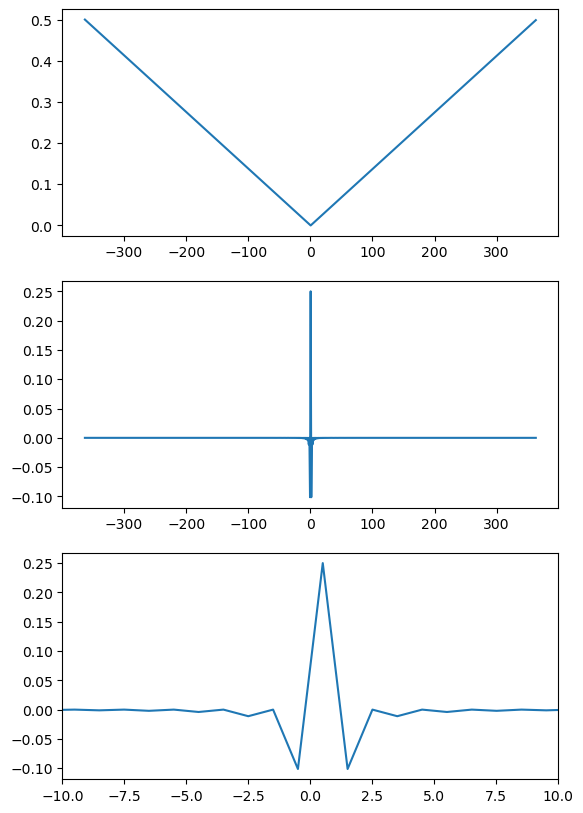

In [3]:
# Lösung:
inverse_filter = filter
inverse_filter = ifftshift(inverse_filter)
inverse_filter = ifft(inverse_filter)
inverse_filter = fftshift(inverse_filter)
inverse_filter = inverse_filter.real

x = np.linspace(-n//2, n//2, n)

fig, axes = plt.subplots(3)

fig.set_figheight(10)

axes[0].plot(x, filter)
axes[1].plot(x, inverse_filter)
axes[2].plot(x, inverse_filter)
axes[2].set_xlim(-10, 10)

plt.show()

c) Faltet die Sinogrammscheiben mit dem Ram-Lak-Kern, um sie zu filtern. (5P)

_Tipp: scipy.ndimage erlaubt via Broadcasting Faltungen mehrerer Signale in einem Aufruf (denkt an die numpy-Tricks vom ersten Blatt)._

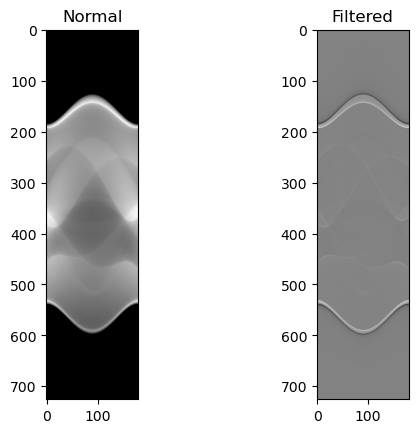

In [4]:
import numpy as np
from scipy.ndimage import convolve

sinogramm = np.load('sinogramm_padded.npy')

# Lösung:
filtered_sinogramm = convolve(sinogramm, inverse_filter[:, None])

fig, axes = plt.subplots(1, 2)

axes[0].set_title("Normal")
axes[0].imshow(sinogramm, cmap="gray")

axes[1].set_title("Filtered")
axes[1].imshow(filtered_sinogramm, cmap="gray")

plt.show()

Wir berechnen nun schrittweise die Rückprojektion:  
$$
f(x,y) = \frac{\pi}{N}\sum_i{\tilde p_{\theta_i}(s)} \text{ mit } s=x \cos \theta_i + y \sin \theta_i
$$  

Dabei bezeichnet $\tilde p_{\theta_i}(s)$ die gefilterte Version der Projektion $p_{\theta_i}(s)$, die wir im vorherigen Schritt berechnet haben.  
Auf dem vorherigen Arbeitsblatt haben wir das Originalbild so gepadded, dass das Sinogramm für jeden Winkel den gesamten Bildinhalt abtastet. Bei der Rekonstruktion beschränken wir uns nun wieder auf die ursprünglichen Bilddimensionen.  
  
d) Erstellt zunächst ein 3D-Array, welches für jeden Pixel im Originalbild und jeden Winkel $\theta_i$ den Wert für s speichert. Dies werden wir dazu nutzen, die Summanden von $f(x,y)$ für alle Pixel $(x,y)$ gleichzeitig zu berechnen, sodass wir nur über die Winkel iterieren müssen. (5P)  
_Tipp: Die Formel für $s$ geht davon aus, dass der Punkt $(0,0)$ im Zentrum des Bildes und die Position $s=0$ im Zentrum des Detektors liegt. Für die Array-Indizes gilt das natürlich nicht, sodass ihr sie entsprechend verschieben müsst. Bedenkt zusätzlich, dass sin und cos in numpy Argumente in rad erwarten._

In [5]:
import skimage

img = skimage.io.imread("SheppLogan.png") / 255.0

# Lösung:
height, width = img.shape
n = filtered_sinogramm.shape[0]

X_vals = np.arange(0, width, 1)
Y_vals = np.arange(0, height, 1)

X, Y = np.meshgrid(X_vals, Y_vals)

X_shifted = X - width // 2
Y_shifted = Y - height // 2

Theta = np.arange(0, 180, 1)

S = np.zeros((height, width, 180))

for t in Theta:
    S[:, :, t] = X_shifted * np.cos(np.radians(t)) + Y_shifted * np.sin(np.radians(t))

e) Berechnet nun die Rückprojektion gemäß der oben genannten Formel. Schaut Euch gern auch Zwischenergebnisse (Partialsummen) an, um einen Eindruck von der Funktionsweise des Algorithmus zu bekommen. (5P)  
_Tipp: Erstellt zunächst ein mit Nullen initialisiertes Bild mit den gewünschten Dimensionen. Addiert dann für jeden Winkel den passenden Summanden. Ihr könnt s runden, damit Ihr nicht interpolieren müsst. In diesem Fall könnt Ihr einen Multi-Index nutzen, um $\tilde p_{\theta_i}(s)$ direkt für alle Pixel zu erhalten._

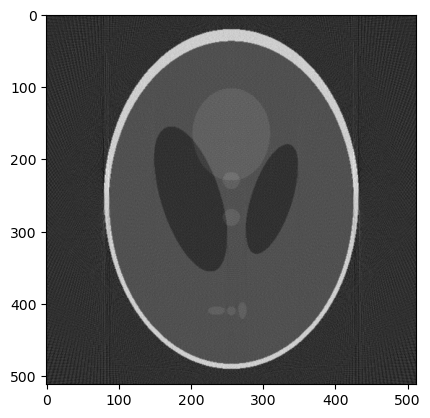

In [6]:
# Lösung:
transformed_img = np.zeros_like(img)

S_rounded = np.round(S).astype(int) + n // 2

for t in Theta:
    idx_S = S_rounded[:, :, t]
    idx_T = np.full_like(idx_S, t)

    transformed_img[Y, X] += filtered_sinogramm[idx_S, idx_T]

transformed_img *= (np.pi / len(Theta))

plt.imshow(transformed_img, cmap="gray")
plt.show()

# Aufgabe 3 (CT und Nuklearmedizin, 10 Punkte)

a) Ein modernes CT-Gerät rotiert zweimal pro Sekunde um den Patienten, nimmt dabei jede Millisekunde eine Projektion auf und fährt den Tisch pro Sekunde um 2cm vor. Rechnet die Zahl der Projektionen pro Umrundung aus. Wie lange dauert eine CT-Aufnahme der Lunge (24cm Höhe)? Könntet Ihr so lange die Luft anhalten, um Bewegungsartefakte zu vermeiden? (2P)

_Lösung:_

$2 \text{ Rotationen pro Sekunde} = 0,5 \text{ Sekunden pro Rotation}$ <br>
$1 \text{ Projektion pro Millisekunde} = 1000 \text{ Projektionen pro Sekunde}$ <br>
$\Rightarrow 0,5 \cdot 1000 = 500 \text{ Projektionen pro Rotation}$ 

$\text{Tisch fährt pro Sekunde 2 cm vor} = 0,5 \text{ Sekunden pro cm}$ <br>
$\Rightarrow 0,5 \cdot 24 = \text{12 Sekunden für 24 cm}$

b) Testmessungen zur Rekalibrierung eines CT-Geräts ergeben die Hounsfield-Werte $h_u^W=10$ für Wasser und $h_u^L=-1100$ für Luft. Berechnet die Koeffizienten $a$ und $b$ einer linearen Transformation $h_k=ah_u+b$ um die übliche Kalibrierung der Hounsfield-Werte wiederherzustellen. (4P)

In [11]:
# Lösung:


_Lösung:_

Sollwerte für Wasser: 0 bzw. Luft: -1000

Gleichungen aufstellen:
\begin{align*}
0 &= a \cdot 10 + b \\
-1000 &= a \cdot (-1100) + b
\end{align*}

LGS lösen:
$a = \frac{100}{111}, b = -\frac{1000}{111}$ <br>
$\Rightarrow h_k = \frac{100}{111} \cdot h_u - \frac{1000}{111}$

c) $^{99m}$ Tc ist ein in der Nuklearmedizin verbreiteter Gammastrahler mit einer Halbwertszeit von 6 Stunden. Angenommen eine Phiole enthalte eine $^{99m}$ Tc-Lösung, für die um 8 Uhr morgens eine Aktivität von 75 MBq/ml bestimmt wurde. Welche Menge dieser Lösung muss um 10:30 Uhr desselben Tages entnommen werden, um eine Aktivität von 225 MBq zu verabreichen? (4P)

In [12]:
# Lösung:


_Lösung:_

$6 \text{h} = 21600 \text{s}$ <br>
$T_{1/2} = \frac{\ln(2)}{\lambda} \Leftrightarrow \lambda = \frac{\ln(2)}{21600}$ <br>
$A(0) = A_0 \cdot \exp(- \lambda 0) = A_0 \Leftrightarrow A_0 = 75 \text{ MBq/ml}$

$2,5 \text{h} = 9000 \text{s}$ <br>
$A(9000) = 75 \cdot \exp(- \frac{\ln(2)}{21600} \cdot 9000) = 75 \cdot \exp(-\frac{5 \cdot \ln(2)}{12}) \approx 56,187 \text{ MBq/ml}$ <br>
$56,186 \cdot V = 225 \Leftrightarrow V = \frac{225}{56,187} \approx 4,004 \text{ ml}$

Es müssen also ca. 4,004 ml entnommen werden, um eine Aktivität von 225 MBq zu erreichen.